In [7]:
from astropy.io import fits

nuevo = fits.open(spc)[2]
#nuevo.info()

comp = Table.read(nuevo)

comp

PROGRAMNAME,CHUNK,PLATEQUALITY,PLATESN2,DEREDSN2,PRIMTARGET,SECTARGET,LAMBDA_EFF,BLUEFIBER,ZOFFSET,XFOCAL,YFOCAL,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,EBOSS_TARGET_ID,THING_ID_TARGETING,SPECPRIMARY,SPECBOSS,BOSS_SPECOBJ_ID,NSPECOBS,CALIBFLUX,CALIBFLUX_IVAR,PLATE,TILE,MJD,FIBERID,RUN2D,RUN1D,OBJTYPE,PLUG_RA,PLUG_DEC,CLASS,SUBCLASS,Z,Z_ERR,RCHI2,DOF,RCHI2DIFF,TFILE,TCOLUMN,NPOLY,THETA,VDISP,VDISP_ERR,VDISPZ,VDISPZ_ERR,VDISPCHI2,VDISPNPIX,VDISPDOF,WAVEMIN,WAVEMAX,WCOVERAGE,ZWARNING,SN_MEDIAN,SN_MEDIAN_ALL,CHI68P,FRACNSIGMA,FRACNSIGHI,FRACNSIGLO,SPECTROFLUX,SPECTROFLUX_IVAR,SPECTROSYNFLUX,SPECTROSYNFLUX_IVAR,SPECTROSKYFLUX,ANYANDMASK,ANYORMASK,SPEC1_G,SPEC1_R,SPEC1_I,SPEC2_G,SPEC2_R,SPEC2_I,ELODIE_FILENAME,ELODIE_OBJECT,ELODIE_SPTYPE,ELODIE_BV,ELODIE_TEFF,ELODIE_LOGG,ELODIE_FEH,ELODIE_Z,ELODIE_Z_ERR,ELODIE_Z_MODELERR,ELODIE_RCHI2,ELODIE_DOF,Z_NOQSO,Z_ERR_NOQSO,ZNUM_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,VDISP_LNL,SPECOBJID,OBJID,PARENTID,FIELDID,SKYVERSION,MODE,CLEAN,RUN,RERUN,CAMCOL,FIELD,ID,PARENT,NCHILD,OBJC_TYPE,OBJC_PROB_PSF,OBJC_FLAGS,OBJC_FLAGS2,OBJC_ROWC,OBJC_ROWCERR,OBJC_COLC,OBJC_COLCERR,ROWVDEG,ROWVDEGERR,COLVDEG,COLVDEGERR,ROWC,ROWCERR,COLC,COLCERR,PETROTHETA,PETROTHETAERR,PETROTH50,PETROTH50ERR,PETROTH90,PETROTH90ERR,Q,QERR,U,UERR,M_E1,M_E2,M_E1E1ERR,M_E1E2ERR,M_E2E2ERR,M_RR_CC,M_RR_CCERR,M_CR4,M_E1_PSF,M_E2_PSF,M_RR_CC_PSF,M_CR4_PSF,THETA_DEV,THETA_DEVERR,AB_DEV,AB_DEVERR,THETA_EXP,THETA_EXPERR,AB_EXP,AB_EXPERR,FRACDEV,FLAGS,FLAGS2,TYPE,PROB_PSF,NPROF,PROFMEAN_NMGY,PROFERR_NMGY,STAR_LNL,EXP_LNL,DEV_LNL,PSP_STATUS,PIXSCALE,RA,DEC,CX,CY,CZ,RAERR,DECERR,L,B,OFFSETRA,OFFSETDEC,PSF_FWHM,AIRMASS,PHI_OFFSET,PHI_DEV_DEG,PHI_EXP_DEG,EXTINCTION,SKYFLUX,SKYFLUX_IVAR,PSFFLUX,PSFFLUX_IVAR,PSFMAG,PSFMAGERR,FIBERFLUX,FIBERFLUX_IVAR,FIBERMAG,FIBERMAGERR,FIBER2FLUX,FIBER2FLUX_IVAR,FIBER2MAG,FIBER2MAGERR,CMODELFLUX,CMODELFLUX_IVAR,CMODELMAG,CMODELMAGERR,MODELFLUX,MODELFLUX_IVAR,MODELMAG,MODELMAGERR,PETROFLUX,PETROFLUX_IVAR,PETROMAG,PETROMAGERR,DEVFLUX,DEVFLUX_IVAR,DEVMAG,DEVMAGERR,EXPFLUX,EXPFLUX_IVAR,EXPMAG,EXPMAGERR,APERFLUX,APERFLUX_IVAR,CLOUDCAM,CALIB_STATUS,NMGYPERCOUNT,NMGYPERCOUNT_IVAR,TAI,RESOLVE_STATUS,THING_ID,IFIELD,BALKAN_ID,NOBSERVE,NDETECT,NEDGE,SCORE
str27,str14,str4,float32,float32,int32,int32,float32,int32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,int64,int64,uint8,uint8,int32,int16,float32[5],float32[5],int32,int32,int32,int32,str7,str7,str16,float64,float64,str6,str21,float32,float32,float32,int32,float32,str24,int32[10],int32,float32[10],float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32[5],float32,float32,float32[10],float32[10],float32[10],float32[5],float32[5],float32[5],float32[5],float32[5],int32,int32,float32,float32,float32,float32,float32,float32,str16,str9,str12,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,int32,int32,str6,str21,float32,float32[35],uint64,str19,str19,str19,uint8,uint8,uint8,int16,str3,uint8,int16,int16,int16,int16,int32,float32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],int32[5],int32[5],int32[5],float32[5],int32[5],"float32[5,15]","float32[5,15]",float32[5],float32[5],float32[5],int32[5],float32[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32[5],

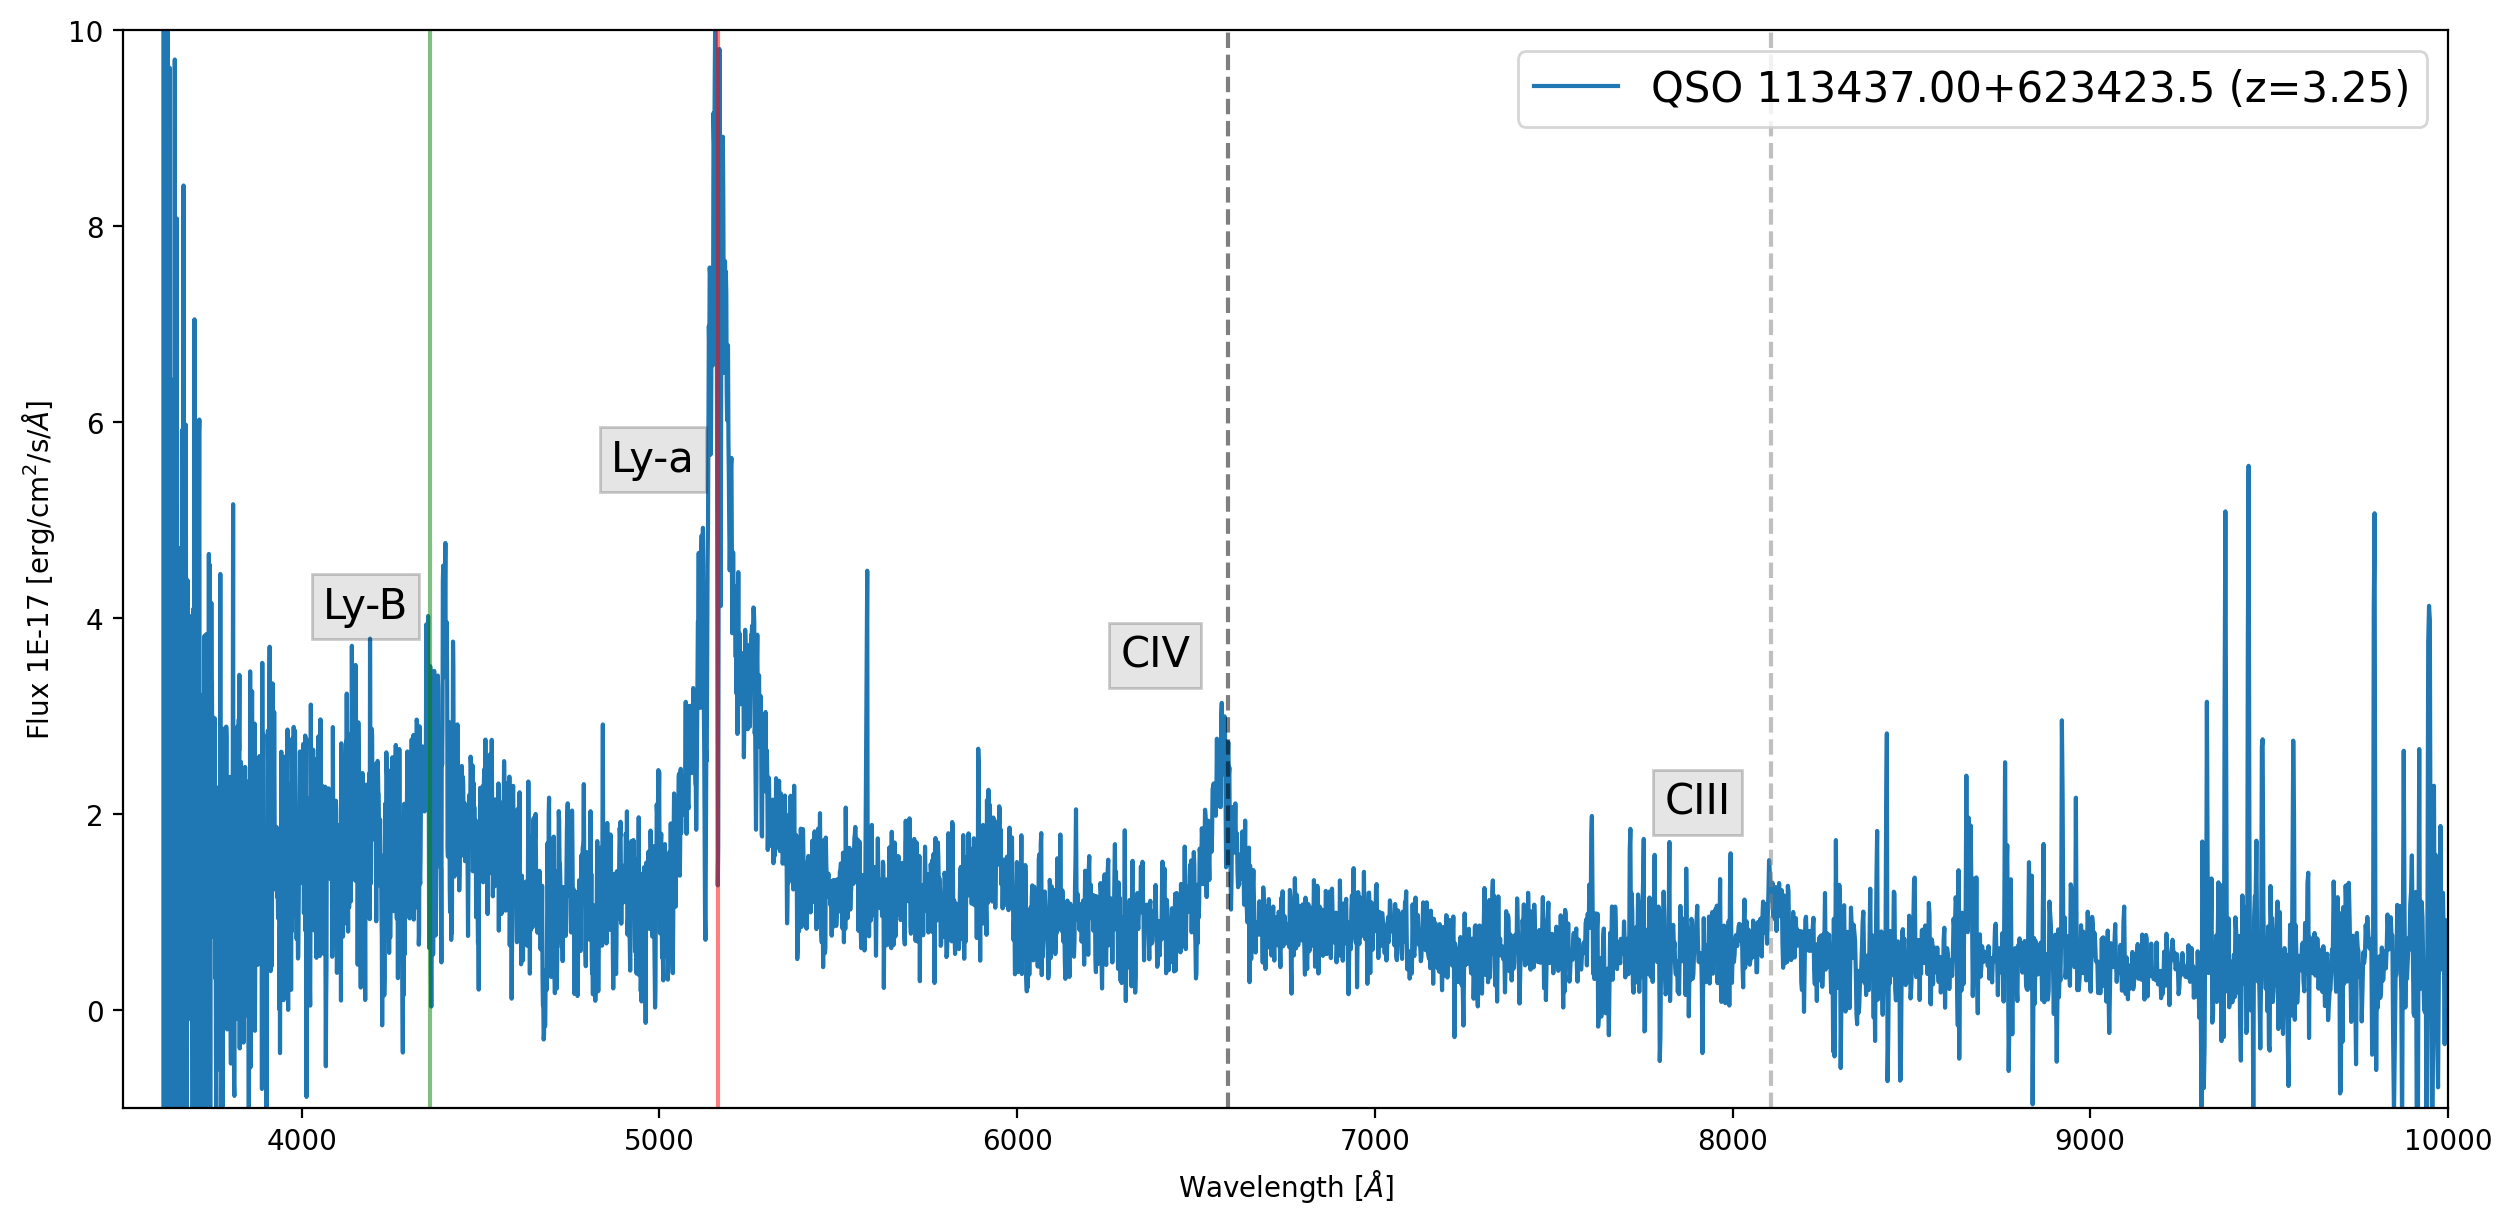

In [6]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from scipy.interpolate import make_interp_spline

file_spc="spec-7107-56740-0667.fits"
local_dirspc="/home/colgoat/Jupyter/Entorno/Otros/"
spc = os.path.join(local_dirspc,file_spc)

def ident():
    nuevo = pyfits.open(spc)[2]
    comp = Table.read(nuevo)
    ti = comp['Z']
    #nuevo.close()
    return ti
  

tat = Table.read(cat)
spectra = Table.read(spc)

info_add = fits.open(spc)[2]
add = Table.read(info_add)


# Define the Lyman-alpha and Lyman-beta rest wavelengths in Angtroms.
lines = {
  "Lyb": 1026.0,
  "Lya": 1215.67,
  "CIV": 1550.772,
  "CIII": 1908.734,
  "MgII": 2802.703,
  "OIII": 5006.843,
  "Ha": 6562.819
}


    #plt.axvline((1. +  (zqso_[i])) * Ha, c='orange', alpha=0.5)
    #plt.axvspan((1. + (zqso_[i])) * lambda_min,(1. + (zqso_[i-1])) * lambda_max,alpha=0.1)

plt.figure(figsize=(15,7),dpi=200)
#plt.text(3, 0, 'Parabola $Y = x^2$', fontsize = 5)
plt.plot(10**spectra['loglam'],spectra['flux'],label = add['OBJTYPE'][0]+" "+'113437.00+623423.5'\
         +" (z="+str(round(add['Z'][0],2))+")")
plt.ylabel('Flux 1E-17 [erg/cm$^{2}$/s/$\AA$]') #'Flux 1E-17 erg/cm^2/s/Ang'
plt.xlabel('Wavelength [$\AA$]')
plt.xlim(3500,10000)
plt.ylim(-1,10)


plt.axvline((1+ ident()) * lines["Lya"], c='red', alpha=0.5)
plt.axvline((1+ ident()) * lines["Lyb"], c='green', alpha=0.5)
plt.axvline((1+ ident()) * lines["CIV"], c='black', alpha=0.5,ls ="--")
plt.axvline((1+ ident()) * lines["CIII"], c='gray', alpha=0.5,ls ="--")
plt.axvline((1+ ident()) * lines["MgII"], c='blue', alpha=0.5,ls ="--")
plt.axvline((1+ ident()) * lines["OIII"], c='gray', alpha=0.5,ls ="--")
plt.axvline((1+ ident()) * lines["Ha"], c='blue', alpha=0.5,ls ="--")

#plt.text(0.08, 0.2, 'sin')
plt.text((1+ ident()) * lines["Lya"]-300, 5.5, 'Ly-a', fontsize = 15, 
         bbox = dict(facecolor = 'gray', alpha = 0.2))

plt.text((1+ ident()) * lines["Lyb"]-300, 4, 'Ly-B', fontsize = 15, 
         bbox = dict(facecolor = 'gray', alpha = 0.2))

plt.text((1+ ident()) * lines["CIV"]-300, 3.5, 'CIV', fontsize = 15, 
         bbox = dict(facecolor = 'gray', alpha = 0.2))

plt.text((1+ ident()) * lines["CIII"]-300, 2, 'CIII', fontsize = 15, 
         bbox = dict(facecolor = 'gray', alpha = 0.2))
plt.legend(fontsize =15)
plt.show()


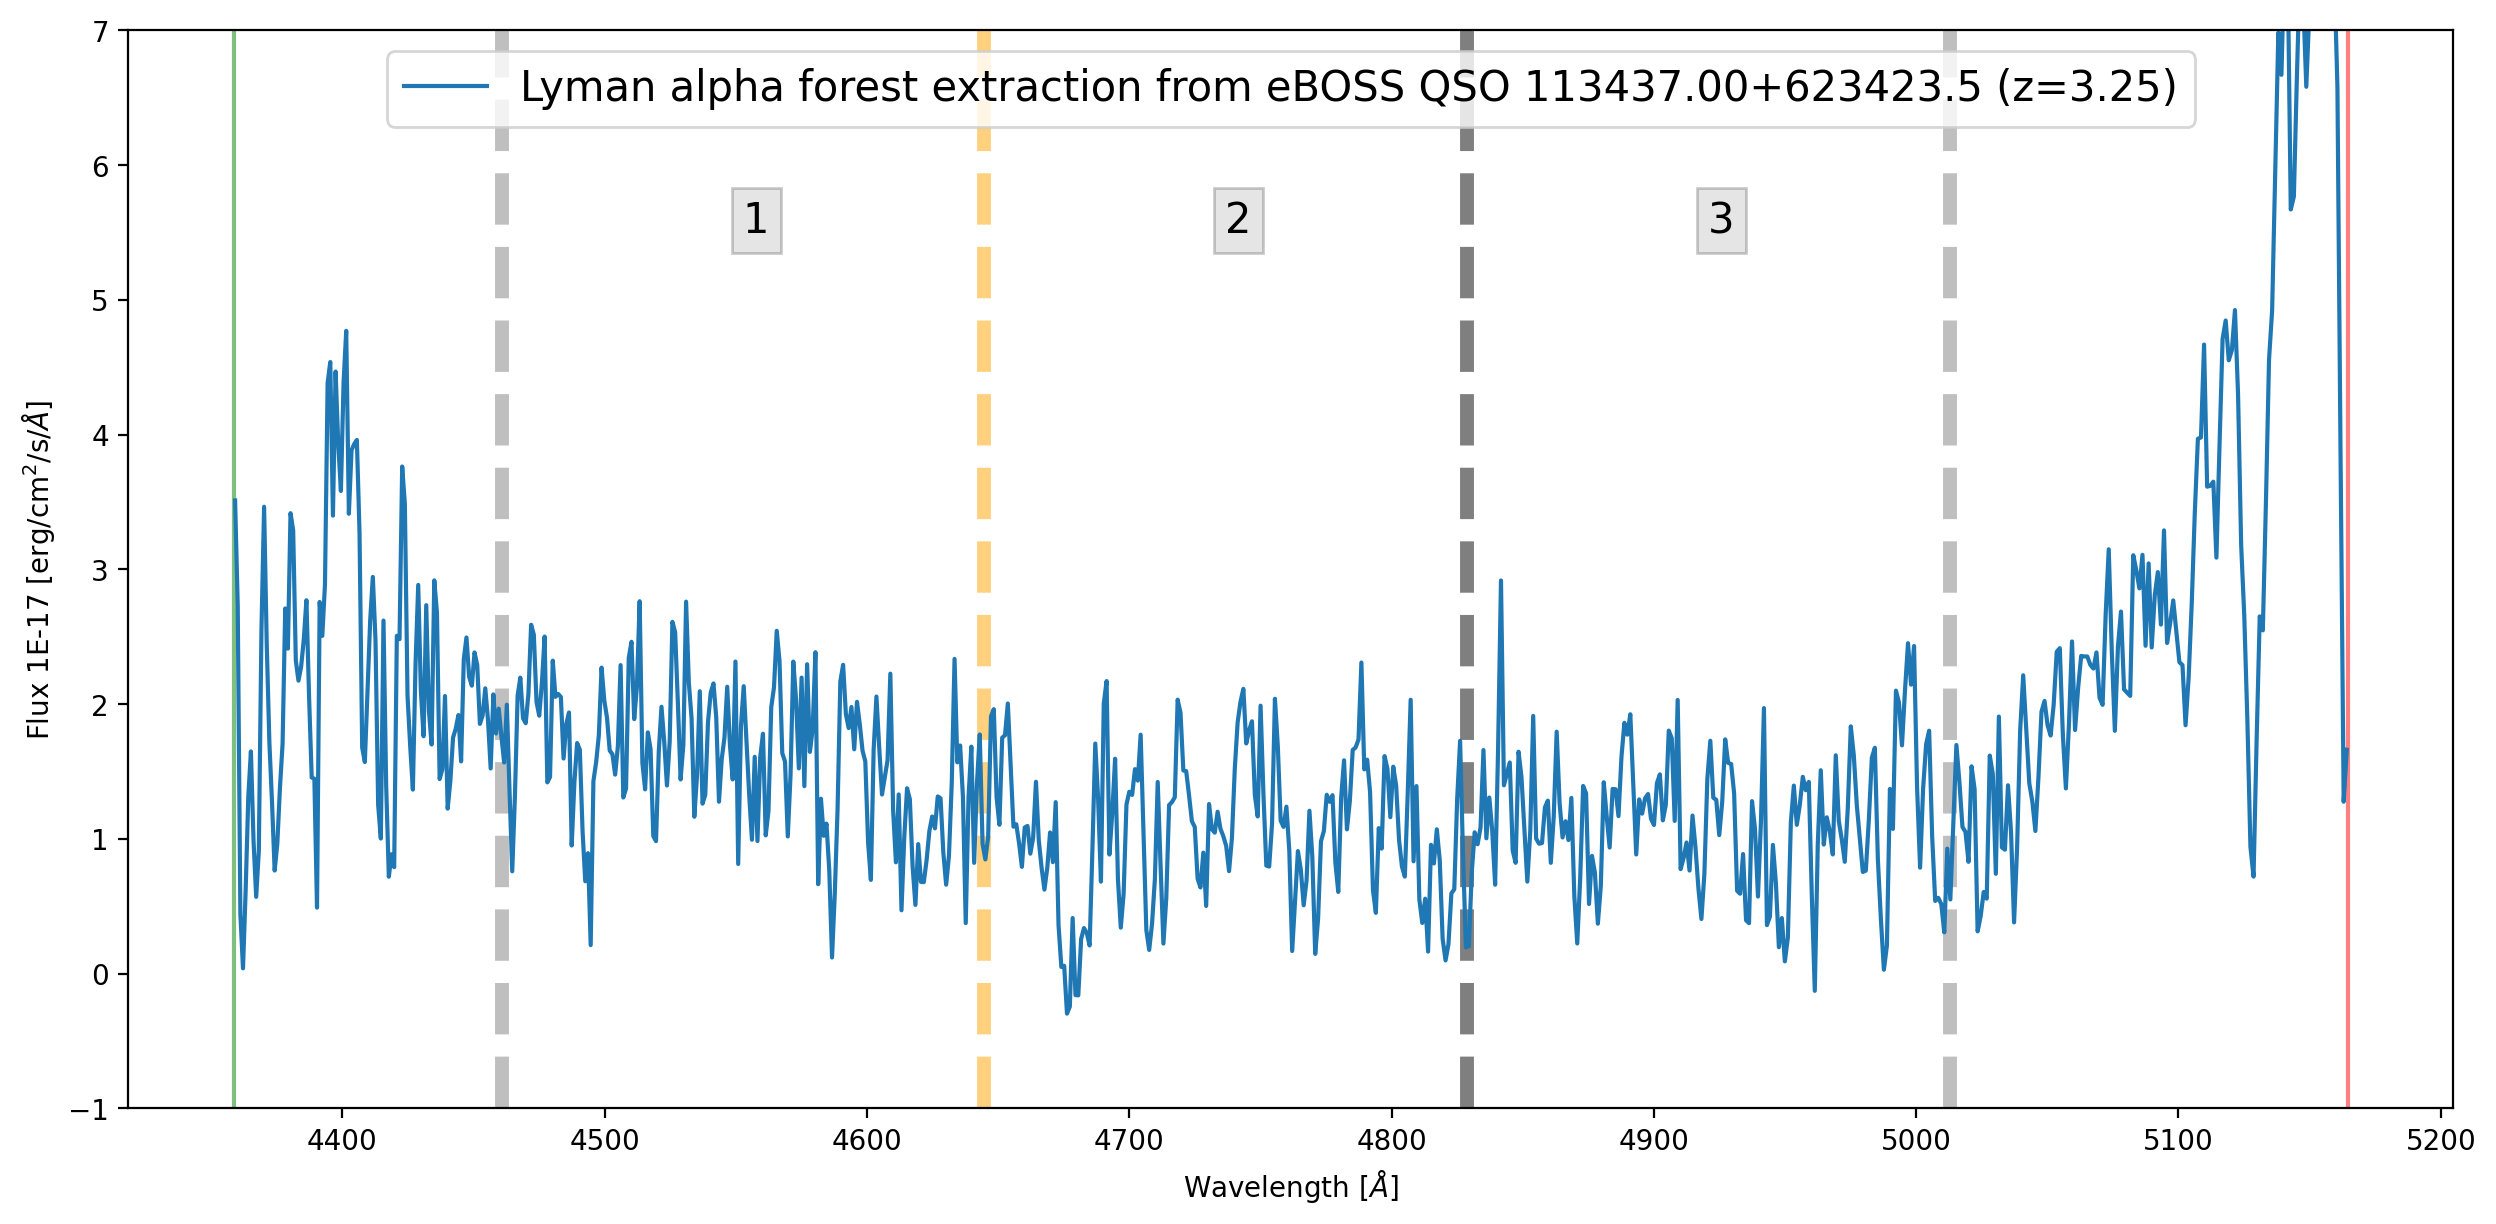

3.2482996


In [8]:

plt.figure(figsize=(15,7),dpi=200)
wave_cut=((10**spectra['loglam'])>(1. + ident()) * lines["Lyb"]) & ((10**spectra['loglam'])<(1. + ident()) * lines["Lya"])
forest = spectra[wave_cut]
plt.axvline((1+ ident()) * lines["Lya"], c='red', alpha=0.5)
plt.axvline((1+ ident()) * lines["Lyb"], c='green', alpha=0.5)

plt.axvline((1+ ident()) * 1050, c='gray', alpha=0.5,ls ="--", linewidth =5)
plt.axvline((1+ ident()) * 1093.3, c='orange', alpha=0.5,ls ="--", linewidth =5)
plt.axvline((1+ ident()) * 1136.6, c='black', alpha=0.5,ls ="--", linewidth =5)
plt.axvline((1+ ident()) * 1180, c='gray', alpha=0.5,ls ="--", linewidth =5)


plt.plot(10**forest['loglam'],forest['flux'], label = 'Lyman alpha forest extraction from eBOSS '+add['OBJTYPE'][0]+" "+'113437.00+623423.5'\
         +" (z="+str(round(add['Z'][0],2))+")")
plt.ylim(-1,7)
plt.ylabel('Flux 1E-17 [erg/cm$^{2}$/s/$\AA$]') #'Flux 1E-17 erg/cm^2/s/Ang'
plt.xlabel('Wavelength [$\AA$]')


plt.text((1+ ident()) * 1071.65, 5.5, '1', fontsize = 15, 
         bbox = dict(facecolor = 'gray', alpha = 0.2))
plt.text((1+ ident()) * 1114.95, 5.5, '2', fontsize = 15, 
         bbox = dict(facecolor = 'gray', alpha = 0.2))
plt.text((1+ ident()) * 1158.25, 5.5, '3', fontsize = 15, 
         bbox = dict(facecolor = 'gray', alpha = 0.2))
plt.legend(fontsize =15)
plt.show()
ident()

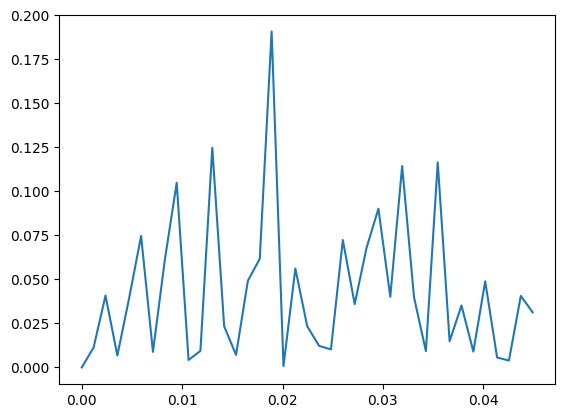

K,PK_RAW,PK_NOISE,PK_DIFF,COR_RESO,PK
(km/s)^-1,km / s,km / s,km / s,km / s,km / s
float64,float64,float64,float64,float64,float64
0.0,5.292211321601477,0.0,3.5767455471636285,1.0,-1.1323328063861977
0.0011820960103378394,30.270364472076164,0.0,4.644581712604096,0.9909119221258972,24.064520581132772
0.002364192020675679,54.2727312221769,0.0,10.340111312147094,0.9641398954236178,49.627846872954045
0.0035462880310135184,6.033627541757914,0.0,6.151342058456692,0.9211164090427398,-0.42439433538700755
0.004728384041351358,26.354457947099952,0.0,0.7458718192268358,0.8640873423062411,23.06469825830283
0.005910480051689196,39.70795344254883,0.0,2.2763444386451854,0.7959179441728318,41.81763906472969
...,...,...,...,...,...
0.039009168341148696,0.7283010883392121,0.0,0.34182378852925627,4.615452085611921e-05,-123416.79501788715


In [134]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from scipy.interpolate import make_interp_spline



file_cat="Pk1D-74_C.fits"
local_dircat="/home/colgoat/Tesis/"
name = os.path.join(local_dircat,file_cat)

nuevo = pyfits.open(name)[245]

PS = Table.read(nuevo)


plt.plot(PS['K'],(PS['PK_RAW']*PS['K'])/np.pi)
plt.show()
PS


In [122]:
from astropy.io import fits

nuevo = fits.open(name)
nuevo.info()

Filename: /home/colgoat/Tesis/Pk1D-74_C.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     35   82R x 6C   [D, D, D, D, D, D]   
  2                1 BinTableHDU     35   45R x 6C   [D, D, D, D, D, D]   
  3                1 BinTableHDU     35   38R x 6C   [D, D, D, D, D, D]   
  4                1 BinTableHDU     35   41R x 6C   [D, D, D, D, D, D]   
  5                1 BinTableHDU     35   42R x 6C   [D, D, D, D, D, D]   
  6                1 BinTableHDU     35   41R x 6C   [D, D, D, D, D, D]   
  7                1 BinTableHDU     35   42R x 6C   [D, D, D, D, D, D]   
  8                1 BinTableHDU     35   68R x 6C   [D, D, D, D, D, D]   
  9                1 BinTableHDU     35   41R x 6C   [D, D, D, D, D, D]   
 10                1 BinTableHDU     35   41R x 6C   [D, D, D, D, D, D]   
 11                1 BinTableHDU     35   41R x 6C   [D, D, D, D, D, D]   
 12              